# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox


# import data

In [2]:
shelter = pd.read_csv(r'C:\Users\hazre\OneDrive\OneNote\GitHub\Final-Project\shelter.csv')

### check it

In [3]:
shelter

,id,intakereason,breedname,speciesname,sexname,movementtype,intakeDate,movementDate,CatAgeGroup,DogAgeGroup,movementMonth,movementDay,movementYear,intakeMonth,intakeDay,intakeYear
0,15801,Moving,Domestic Short Hair,Cat,Female,Adoption,11/28/2009,05/13/2017,Senior,Senior,5,13,2017,11,28,2009
1,15932,Moving,German Shepherd Dog/Mix,Dog,Male,Adoption,12/08/2009,04/24/2017,Mature,Senior,4,24,2017,12,8,2009
2,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Adoption,08/10/2012,04/15/2017,Mature,Mature,4,15,2017,8,10,2012
3,28859,Abandoned,Shep Mix/Siberian Husky,Dog,Female,Reclaimed,08/10/2012,02/29/2020,Mature,Mature,2,29,2020,8,10,2012
4,30812,Abandoned,Domestic Short Hair,Cat,Female,Foster,01/11/2013,04/18/2017,Mature,Senior,4,18,2017,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,72252,Stray,Beagle,Dog,Female,Reclaimed,01/15/2022,01/16/2022,Geriatric,Geriatric,1,16,2022,1,15,2022
18060,72253,Owner requested Euthanasia,Chihuahua,Dog,Female,Foster,01/15/2022,01/20/2022,Geriatric,Geriatric,1,20,2022,1,15,2022
18061,72253,Owner requested Euthanasia,Chihuahua,Dog,Female,Adoption,01/15/2022,01/24/2022,Geriatric,Geriatric,1,24,2022,1,15,2022
18062,72260,Moving,Domestic Short Hair,Cat,Female,Transfer,01/18/2022,01/19/2022,Adult,Adult,1,19,2022,1,18,2022


# predict cat adoptions

# data wrangling

# create df with only the columns I want

In [4]:
shelter.columns

Index(['id', 'intakereason', 'breedname', 'speciesname', 'sexname',
       'movementtype', 'intakeDate', 'movementDate', 'CatAgeGroup',
       'DogAgeGroup', 'movementMonth', 'movementDay', 'movementYear',
       'intakeMonth', 'intakeDay', 'intakeYear'],
      dtype='object')

In [5]:
shelter1 = shelter[{'sexname', 'movementtype', 'CatAgeGroup', 'movementMonth' }]

In [6]:
shelter1

,CatAgeGroup,movementtype,sexname,movementMonth
0,Senior,Adoption,Female,5
1,Mature,Adoption,Male,4
2,Mature,Adoption,Female,4
3,Mature,Reclaimed,Female,2
4,Mature,Foster,Female,4
...,...,...,...,...
18059,Geriatric,Reclaimed,Female,1
18060,Geriatric,Foster,Female,1
18061,Geriatric,Adoption,Female,1
18062,Adult,Transfer,Female,1


# create new columns for CatAgeGroup

In [7]:
shelter1.CatAgeGroup.value_counts()

Adult         8210
Adolescent    6388
Mature        1405
Kitten        1077
Senior         760
Geriatric      224
Name: CatAgeGroup, dtype: int64

In [8]:
dummy_ages = pd.get_dummies(shelter1['CatAgeGroup'])
dummy_ages

,Adolescent,Adult,Geriatric,Kitten,Mature,Senior
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
18059,0,0,1,0,0,0
18060,0,0,1,0,0,0
18061,0,0,1,0,0,0
18062,0,1,0,0,0,0


## merge dummy code with data

In [9]:
shelter2 = pd.concat([shelter1, dummy_ages], axis = 1)

In [10]:
shelter2

,CatAgeGroup,movementtype,sexname,movementMonth,Adolescent,Adult,Geriatric,Kitten,Mature,Senior
0,Senior,Adoption,Female,5,0,0,0,0,0,1
1,Mature,Adoption,Male,4,0,0,0,0,1,0
2,Mature,Adoption,Female,4,0,0,0,0,1,0
3,Mature,Reclaimed,Female,2,0,0,0,0,1,0
4,Mature,Foster,Female,4,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
18059,Geriatric,Reclaimed,Female,1,0,0,1,0,0,0
18060,Geriatric,Foster,Female,1,0,0,1,0,0,0
18061,Geriatric,Adoption,Female,1,0,0,1,0,0,0
18062,Adult,Transfer,Female,1,0,1,0,0,0,0


# recode sexname from male, female to 0,1

In [11]:
def sexnameR (series):
    if series == 'Male':
        return 0
    if series == 'Female':
        return 1
shelter2['sexnameR'] = shelter['sexname'].apply(sexnameR)

In [12]:
shelter2

,CatAgeGroup,movementtype,sexname,movementMonth,Adolescent,Adult,Geriatric,Kitten,Mature,Senior,sexnameR
0,Senior,Adoption,Female,5,0,0,0,0,0,1,1
1,Mature,Adoption,Male,4,0,0,0,0,1,0,0
2,Mature,Adoption,Female,4,0,0,0,0,1,0,1
3,Mature,Reclaimed,Female,2,0,0,0,0,1,0,1
4,Mature,Foster,Female,4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
18059,Geriatric,Reclaimed,Female,1,0,0,1,0,0,0,1
18060,Geriatric,Foster,Female,1,0,0,1,0,0,0,1
18061,Geriatric,Adoption,Female,1,0,0,1,0,0,0,1
18062,Adult,Transfer,Female,1,0,1,0,0,0,0,1


# recode movementtype to show 'Adoption' vs 'No adoption'

In [13]:
shelter2.movementtype.value_counts()

Adoption            10403
Foster               4847
Reclaimed            2381
Transfer              392
Released To Wild       25
Escaped                 8
Stolen                  8
Name: movementtype, dtype: int64

In [14]:
def movementtypeR (series):
    if series == 'Adoption':
        return 1
    else:
        return 0
shelter2['movementtypeR'] = shelter['movementtype'].apply(movementtypeR)

In [15]:
shelter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CatAgeGroup    18064 non-null  object
 1   movementtype   18064 non-null  object
 2   sexname        18064 non-null  object
 3   movementMonth  18064 non-null  int64 
 4   Adolescent     18064 non-null  uint8 
 5   Adult          18064 non-null  uint8 
 6   Geriatric      18064 non-null  uint8 
 7   Kitten         18064 non-null  uint8 
 8   Mature         18064 non-null  uint8 
 9   Senior         18064 non-null  uint8 
 10  sexnameR       18064 non-null  int64 
 11  movementtypeR  18064 non-null  int64 
dtypes: int64(3), object(3), uint8(6)
memory usage: 952.7+ KB


## convert uint8 to int64

In [16]:
shelter2['Adolescent'] = shelter2['Adolescent'].astype(np.int64)
print (shelter2['Adolescent'])

0        0
1        0
2        0
3        0
4        0
        ..
18059    0
18060    0
18061    0
18062    0
18063    1
Name: Adolescent, Length: 18064, dtype: int64


In [17]:
shelter2['Adult'] = shelter2['Adult'].astype(np.int64)
print (shelter2['Adult'])

0        0
1        0
2        0
3        0
4        0
        ..
18059    0
18060    0
18061    0
18062    1
18063    0
Name: Adult, Length: 18064, dtype: int64


In [18]:
shelter2['Geriatric'] = shelter2['Geriatric'].astype(np.int64)
print (shelter2['Geriatric'])

0        0
1        0
2        0
3        0
4        0
        ..
18059    1
18060    1
18061    1
18062    0
18063    0
Name: Geriatric, Length: 18064, dtype: int64


In [19]:
shelter2['Kitten'] = shelter2['Kitten'].astype(np.int64)
print (shelter2['Kitten'])

0        0
1        0
2        0
3        0
4        0
        ..
18059    0
18060    0
18061    0
18062    0
18063    0
Name: Kitten, Length: 18064, dtype: int64


In [20]:
shelter2['Mature'] = shelter2['Mature'].astype(np.int64)
print (shelter2['Mature'])

0        0
1        1
2        1
3        1
4        1
        ..
18059    0
18060    0
18061    0
18062    0
18063    0
Name: Mature, Length: 18064, dtype: int64


In [21]:
shelter2['Senior'] = shelter2['Senior'].astype(np.int64)
print (shelter2['Senior'])

0        1
1        0
2        0
3        0
4        0
        ..
18059    0
18060    0
18061    0
18062    0
18063    0
Name: Senior, Length: 18064, dtype: int64


In [22]:
shelter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CatAgeGroup    18064 non-null  object
 1   movementtype   18064 non-null  object
 2   sexname        18064 non-null  object
 3   movementMonth  18064 non-null  int64 
 4   Adolescent     18064 non-null  int64 
 5   Adult          18064 non-null  int64 
 6   Geriatric      18064 non-null  int64 
 7   Kitten         18064 non-null  int64 
 8   Mature         18064 non-null  int64 
 9   Senior         18064 non-null  int64 
 10  sexnameR       18064 non-null  int64 
 11  movementtypeR  18064 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 1.7+ MB


# Machine Learning                                          

# import packages


In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## creating subsets for x, y variables

In [24]:
x= shelter2[[ 'Adult', 'Geriatric', 'Kitten', 'Mature', 'Adolescent', 'Senior', 
             'sexnameR', 'movementMonth']]
y= shelter2['movementtypeR']


## Train test split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 101)

## initial random forest model

In [26]:
forest= RandomForestClassifier(n_estimators = 500)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

# evaluate model fit

In [27]:
forestPredictions = forest.predict(x_test)
print (confusion_matrix(y_test, forestPredictions))
print (classification_report(y_test, forestPredictions))

[[ 808 2240]
 [ 578 3600]]
              precision    recall  f1-score   support

           0       0.58      0.27      0.36      3048
           1       0.62      0.86      0.72      4178

    accuracy                           0.61      7226
   macro avg       0.60      0.56      0.54      7226
weighted avg       0.60      0.61      0.57      7226



# hyperparameter tuning

# import packages

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# number of estimators

In [29]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : 0.6091890395792969
4 : 0.6072515914752283
5 : 0.6096042070301688
8 : 0.6069748131746471
10 : 0.6114032659839469
20 : 0.6104345419319125
50 : 0.6104345419319125
75 : 0.6101577636313313
100 : 0.6101577636313313
250 : 0.6101577636313313
500 : 0.6108497093827844


# use 10 trees for best accuracy instead of the standard 500

# plot it

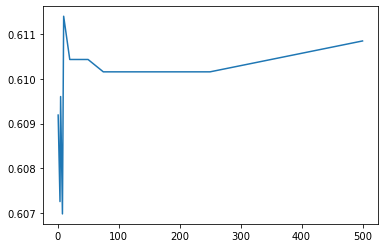

In [30]:
plt.plot(n_estimators_array, results)

# tuning the remaining


In [31]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


# this code gives a random search of the random_grid

In [32]:
rf= RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter=90, cv=3, random_state=42)

# fit

In [33]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

# best accuracy hyperparameter

In [34]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}

# model with the best accuracy has at least 2 samples per leaf, max features at log2, and a maximum depth of 10

# run random forest with these parameters

In [35]:
forest= RandomForestClassifier(n_estimators = 10, min_samples_leaf = 2, max_features = 'log2', max_depth=10)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       n_estimators=10)

# run prediction and classification report for details

In [36]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 914 2134]
 [ 671 3507]]
              precision    recall  f1-score   support

           0       0.58      0.30      0.39      3048
           1       0.62      0.84      0.71      4178

    accuracy                           0.61      7226
   macro avg       0.60      0.57      0.55      7226
weighted avg       0.60      0.61      0.58      7226



# 60% accuracy weighted

# feature importance

In [37]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

Adult            0.051268
Geriatric        0.093162
Kitten           0.092728
Mature           0.029280
Adolescent       0.021222
Senior           0.066895
sexnameR         0.045174
movementMonth    0.600272
dtype: float64

# sort values in order of feature importance

In [38]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

movementMonth    0.600272
Geriatric        0.093162
Kitten           0.092728
Senior           0.066895
Adult            0.051268
sexnameR         0.045174
Mature           0.029280
Adolescent       0.021222
dtype: float64


# visualization

<AxesSubplot:>

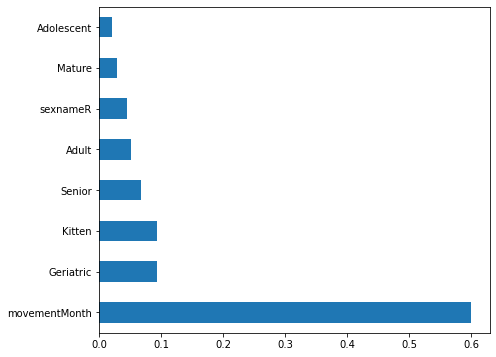

In [39]:
feature_importances.plot(kind= 'barh', figsize= (7,6))